In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:/STUDIES/Machine Learning Hands-On/California dataset/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# bedrooms has missing values

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

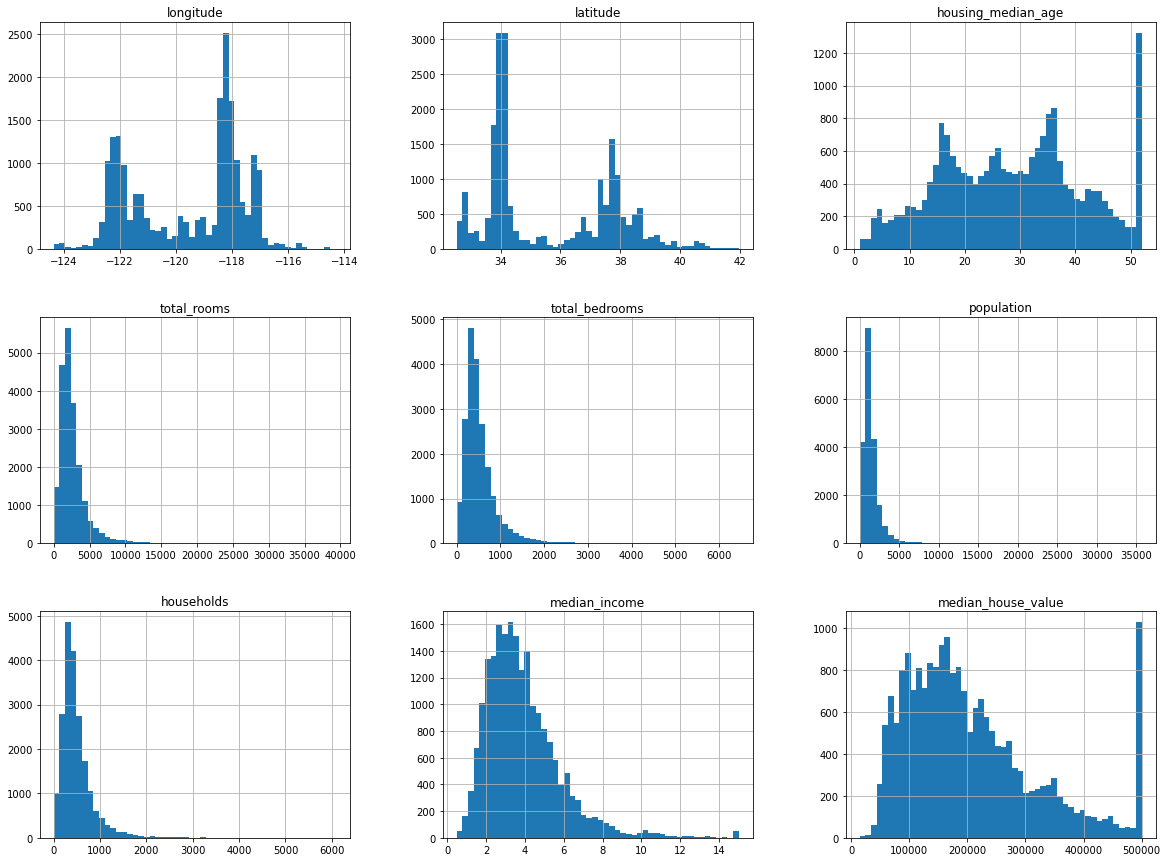

In [6]:
df.hist(bins=50, figsize=(20, 15))

In [7]:
# data is tail heavy

# Dividing the dataset into training and testing sets using stratified sampling

#### Stratified sampling makes sure that the proportions between items of a category are maintained in the training and testing sets in order to avoid sampling bias

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

In [9]:
df['income_cat'] = pd.cut(df['median_income'], bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

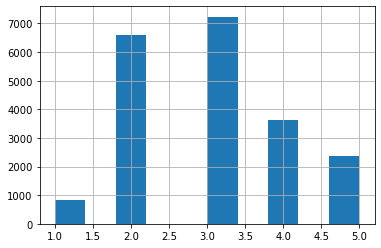

In [10]:
df['income_cat'].hist()

In [11]:
splits = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for strat_train_index, strat_test_index in splits.split(df, df['income_cat']):
    strat_trainset = df.loc[strat_train_index]
    strat_testset = df.loc[strat_test_index]

<AxesSubplot:>

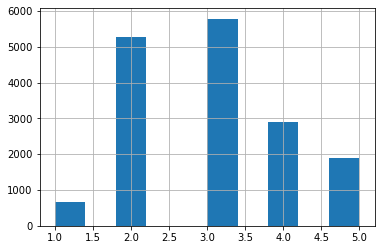

In [12]:
strat_trainset['income_cat'].hist()

<AxesSubplot:>

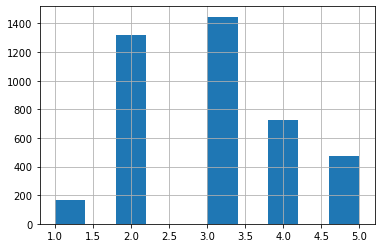

In [13]:
strat_testset['income_cat'].hist()

###### Thus both train and test sets have equal categories of income
Since income is a major factor behind the value of a house

In [14]:
strat_trainset.drop('income_cat', axis=1, inplace=True)

In [15]:
strat_testset.drop('income_cat', axis=1, inplace=True)

In [16]:
strat_trainset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


# EDA

In [17]:
df = strat_trainset.copy()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [18]:
# Since there is geographical data we do a scatterplot on latitudes and longitudes

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

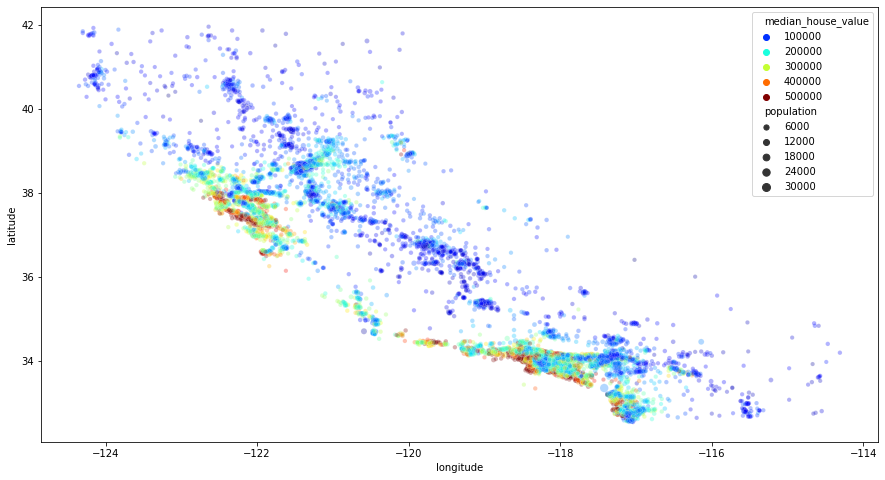

In [19]:
matplotlib.rcParams['figure.figsize'] = (15,8)
sns.scatterplot(data = df, 
                x='longitude', 
                y='latitude', 
                alpha = 0.3, 
                hue='median_house_value', 
                size=df['population'],
                palette=plt.get_cmap('jet'))

##### The house price is related to the location and population density
Most of the houses away from the coastal region has house price in the range 100k

## Finding correlations

<AxesSubplot:>

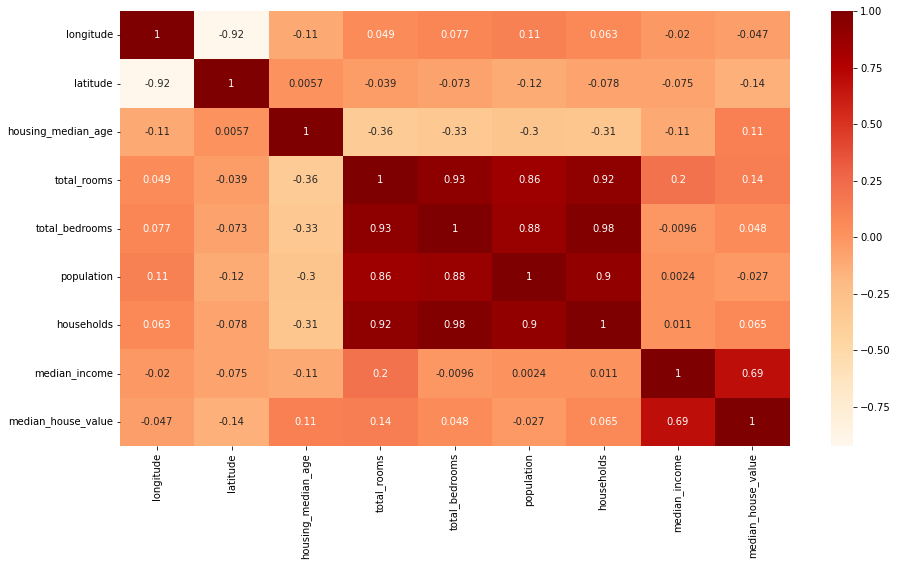

In [20]:
# linear correlation
sns.heatmap(df.corr(), cbar=True, cmap='OrRd', annot=True)

##### Positive corr
1. house value and income are strongly positively correlated
2. Households has a strong positive correlation with total rooms, total bedrooms and population
3. total rooms has a strong positive correlation with total bedrooms, population and household
4. total bedrooms has a strong positive correlation with total rooms, population and households

##### Negative corr
1. latitude is strongly negatively correlated with longitude. So the datapoints of the locations look like a diagonal (as is evident from the previous scatterplot of the latitude vs longitude)
2. housing median age is negatively correlated with total rooms, total bedrooms, population and households

In [21]:
df.corr()['median_house_value'].sort_values()

latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

## Finding new features and then doing the correration

In [22]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['population_per_household'] = df['population'] / df['households']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,bedrooms_per_household,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,0.205784,1.128895,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,0.160714,1.113281,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,0.191595,1.033333,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,0.276505,1.074534,3.886128,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,0.182692,1.113793,6.096552,3.167241


### Correlations

In [23]:
df.corr()['median_house_value'].sort_values()

bedrooms_per_room          -0.259952
latitude                   -0.142673
longitude                  -0.047466
bedrooms_per_household     -0.043349
population                 -0.026882
population_per_household   -0.021991
total_bedrooms              0.047781
households                  0.064590
housing_median_age          0.114146
total_rooms                 0.135140
rooms_per_household         0.146255
median_income               0.687151
median_house_value          1.000000
Name: median_house_value, dtype: float64

##### house value now has additional negative correlation with bedrooms per room

<AxesSubplot:>

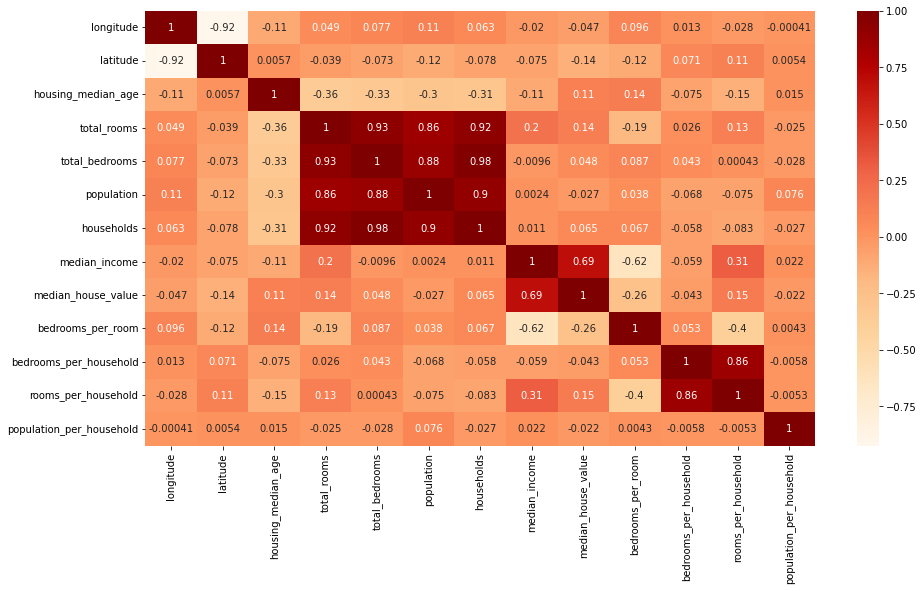

In [24]:
sns.heatmap(df.corr(), cmap='OrRd', annot=True, cbar=True)

##### Positive corr
1. Bedrooms per household is too strongly correlated with rooms per household. We can remove this feature and keep rooms per household to reduce dimensions. The rest of the values of this feature has no correlation.
2. Same goes for population per household
3. rooms per household has positive correlation with median income

##### Negative corr
1. rooms per household has negative correlation with bedrooms per room
2. bedrooms per room has negative correlation with median income and median house value(as stated before)

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,bedrooms_per_household,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,0.205784,1.128895,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,0.160714,1.113281,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,0.191595,1.033333,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,0.276505,1.074534,3.886128,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,0.182692,1.113793,6.096552,3.167241


# Data Cleaning

In [26]:
df = strat_trainset.drop('median_house_value', axis=1)
df_label = strat_trainset['median_house_value']

In [27]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [28]:
df_label

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

## removing missing values

In [29]:
df.isnull().sum() #total bedrooms has 158 missing values out of 16512 total values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [31]:
# Imputing Option 1
def missingValues1(df):
    median = df['total_bedrooms'].median() # We will use this median later in the testing set
    df['total_bedrooms'].fillna(median, inplace=True)

In [32]:
# Inputing Option 2
from sklearn.impute import SimpleImputer
def missingValues2(df):
    impute = SimpleImputer(strategy='median')
    df_num = df.drop('ocean_proximity', axis=1)
    impute.fit(df_num) #With this method every numerical feature that has missing values will be imputed with that feature's median
    X = impute.transform(df_num)
    df_tr = pd.DataFrame(X, columns=df_num.columns)
    df_tr.head()

## Handling categorical features

In [33]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [34]:
df_cat = df[['ocean_proximity']]
df_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [35]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()
ordinal_array = ordinal.fit_transform(df_cat)
print(ordinal_array[:10])
print(ordinal.categories_)
print(df_cat['ocean_proximity'].unique())

[[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
['INLAND' 'NEAR OCEAN' '<1H OCEAN' 'NEAR BAY' 'ISLAND']


##### Ordinal encoding is useful for categories which are ordinal in nature. Ocean proximity is not ordinal

In [54]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
onehot_array = onehot.fit_transform(df_cat)
onehot_array[:10]

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

# Feature Scaling

#### Scaling is not done on labels. There are 2 types of scaling methods:
1. MinMax Scaler ( or Normalization)
2. Standardization"

###### MinMax Scaling : Scaled values lies in the range 0-1 (although can be changed using feature_range hyperparameter. More affected by outliers
This is calculated by : (current val - min val) / (max val - min val)

###### Standardization : Scaled values have no range as such. Standardized values have  mean. Less affected by outliers
This is calculated by : (current val - mean) / S.D
This method might be a problem for some algorithms(such as NNs)

## Using Transformation pipelines for encoding and feature scaling

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
df_num = df.drop('ocean_proximity', axis=1)

# Pipeline for numerical attributes
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())])
df_num_tr = num_pipeline.fit_transform(df_num)
df_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

## Applying transformation pipeline to both numerical and categorical features

In [55]:
from sklearn.compose import ColumnTransformer
num_attribs = list(df_num)           # We pass only the numerical feature names
cat_attribs = ["ocean_proximity"]    # We pass only the categorical feature names (and not the values)
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs),])
df_prepared = full_pipeline.fit_transform(df)

In [56]:
df_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# Model training and evaluating